In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

keras kütüphanesi eklendi ve tensorflow kütüphanesi arka planda çalışır hale getirildi.

In [2]:
import os, shutil

In [3]:
original_dataset_dir = 'd:/veri'


base_dir = 'd:/kveri'
os.mkdir(base_dir)

MaxPooling kullanılıyor,model oluşturuluyor ve ağ olusturuluyor.

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


#train(eğitim)dosyası oluşturuluyor.
train_kaplumbaga_dir = os.path.join(train_dir, 'kaplumbaga')
os.mkdir(train_kaplumbaga_dir)



train_arac_dir = os.path.join(train_dir, 'arac')
os.mkdir(train_arac_dir)


#doğrulama dosyası oluşturuluyor.
validation_kaplumbaga_dir = os.path.join(validation_dir, 'kaplumbaga')
os.mkdir(validation_kaplumbaga_dir)



validation_arac_dir = os.path.join(validation_dir, 'arac')
os.mkdir(validation_arac_dir)


#test dosyası oluşturuluyor.
test_kaplumbaga_dir = os.path.join(test_dir, 'kaplumbaga')
os.mkdir(test_kaplumbaga_dir)



test_arac_dir = os.path.join(test_dir, 'arac')
os.mkdir(test_arac_dir)


#dosyalara fotograflar bölünüyor.train(eğitim) resimleri 60 adet
fnames = ['kaplumbaga.{}.jpg'.format(i) for i in range(60)]#?
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_kaplumbaga_dir, fname)
    shutil.copyfile(src, dst)

#doğrulama verisi 20 adet
fnames = ['kaplumbaga.{}.jpg'.format(i) for i in range(60, 80)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_kaplumbaga_dir, fname)
    shutil.copyfile(src, dst)

#test verisi 20 adet
fnames = ['kaplumbaga.{}.jpg'.format(i) for i in range(80, 100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_kaplumbaga_dir, fname)
    shutil.copyfile(src, dst)
    
    
fnames = ['arac.{}.jpg'.format(i) for i in range(60)]#?
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_arac_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['arac.{}.jpg'.format(i) for i in range(60, 80)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_arac_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['arac.{}.jpg'.format(i) for i in range(80,100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_arac_dir, fname)
    shutil.copyfile(src, dst)



In [5]:
print('total training kaplumbaga images:', len(os.listdir(train_kaplumbaga_dir)))

total training kaplumbaga images: 60


In [6]:
print('total training arac images:', len(os.listdir(train_arac_dir)))

total training arac images: 60


In [7]:
print('total validation kaplumbaga images:', len(os.listdir(validation_kaplumbaga_dir)))

total validation kaplumbaga images: 20


In [8]:
print('total validation arac images:', len(os.listdir(validation_arac_dir)))

total validation arac images: 20


In [9]:
print('total test kaplumbaga images:', len(os.listdir(test_kaplumbaga_dir)))

total test kaplumbaga images: 20


In [10]:
print('total test arac images:', len(os.listdir(test_arac_dir)))

total test arac images: 20


In [11]:
from keras import layers
from keras import models

model = models.Sequential()

#32,64,128 katman sayısıları
#activasyon fonksiyonu = ?
#simoid = kategorik verilerde kullanılan çıkış aktivasyonu.
#(3,3),(2,2) katman çıkışı oluşan matrix boyutu
#input_shape(150,150,3)
#150=resimlerin sisteme giriş pixel boyutu
#3=rgb (resimlerin renkli olmasından kaynaklı yazılır.)

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
from keras import optimizers

#loss=giren değerle son elde edilen çıktı arasındaki fark
#optimayzer=çıkan değerler kötü olunca ağırlıklarla oynayan foksiyon
#çıkan değerlerin doğruluğunu ölçmemizi sağlayan fonksiyon
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

#255? 

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#batch_size sisteme ilk giren verilein büyüklüğü yani sistem verileri 10'ar 10'ar alır.

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


In [16]:
#epoch =sistemi eğitme sayısı

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/5
50/50 [==============================] - 361s 7s/step - loss: 0.3979 - acc: 0.8180 - val_loss: 0.3605 - val_acc: 0.9250
Epoch 2/5
50/50 [==============================] - 387s 8s/step - loss: 0.0653 - acc: 0.9880 - val_loss: 0.6567 - val_acc: 0.6000
Epoch 3/5
50/50 [==============================] - 379s 8s/step - loss: 0.0148 - acc: 0.9980 - val_loss: 0.1912 - val_acc: 0.9000
Epoch 4/5
50/50 [==============================] - 343s 7s/step - loss: 0.0157 - acc: 0.9940 - val_loss: 0.2042 - val_acc: 0.8750
Epoch 5/5
50/50 [==============================] - 310s 6s/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.1605 - val_acc: 0.9500


In [17]:
model.save('kaplumbaga_arac_small_1.h5')

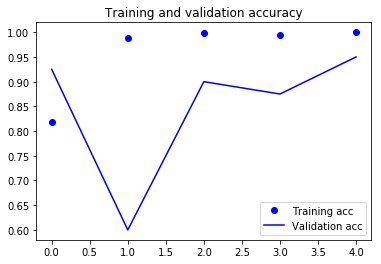

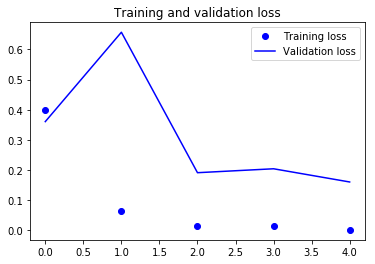

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

data augmentation

In [20]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

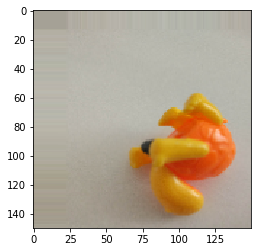

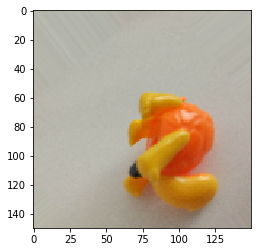

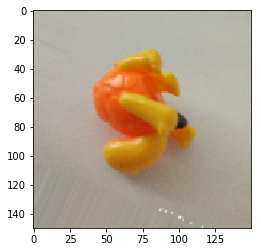

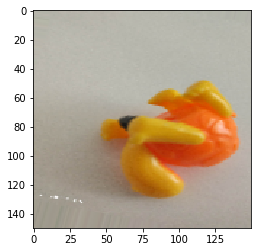

In [21]:
from keras.preprocessing import image

fnames = [os.path.join(train_kaplumbaga_dir, fname) for fname in os.listdir(train_kaplumbaga_dir)]


img_path = fnames[3]


img = image.load_img(img_path, target_size=(150, 150))


x = image.img_to_array(img)


x = x.reshape((1,) + x.shape)


i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [22]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
       
        train_dir,
        
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
50/50 [==============================] - 296s 6s/step - loss: 0.5282 - acc: 0.7500 - val_loss: 0.4404 - val_acc: 0.8250
Epoch 2/5
50/50 [==============================] - 340s 7s/step - loss: 0.1806 - acc: 0.9260 - val_loss: 0.2303 - val_acc: 0.9250
Epoch 3/5
50/50 [==============================] - 335s 7s/step - loss: 0.0838 - acc: 0.9600 - val_loss: 0.1044 - val_acc: 1.0000
Epoch 4/5
50/50 [==============================] - 410s 8s/step - loss: 0.0904 - acc: 0.9640 - val_loss: 0.0899 - val_acc: 1.0000
Epoch 5/5
50/50 [==============================] - 442s 9s/step - loss: 0.0783 - acc: 0.9780 - val_loss: 0.0822 - val_acc: 1.0000


In [24]:
model.save('kaplumbaga_arac_small_2.h5')

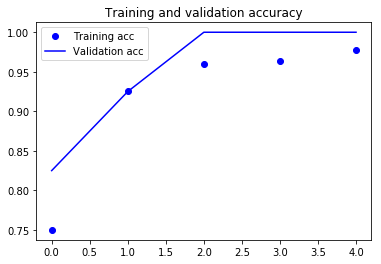

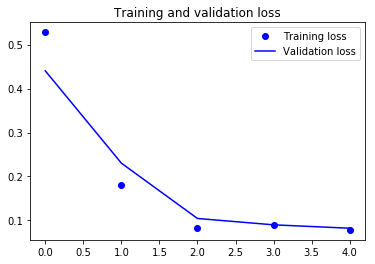

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

bir katmanı silmek (DROPOUT)

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#DropOut içerisindeki değer düştükçe sistem kötü değerler vermeli eğer içerideki değerler düştükçe sistem iyi çıktılar
#veriyorsa kurulan sistemde hata var demektir. 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [28]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/5
50/50 [==============================] - 432s 9s/step - loss: 0.5458 - acc: 0.7140 - val_loss: 0.7530 - val_acc: 0.5000
Epoch 2/5
50/50 [==============================] - 421s 8s/step - loss: 0.2093 - acc: 0.9160 - val_loss: 0.3779 - val_acc: 0.8250
Epoch 3/5
50/50 [==============================] - 418s 8s/step - loss: 0.1076 - acc: 0.9660 - val_loss: 0.3906 - val_acc: 0.8500
Epoch 4/5
50/50 [==============================] - 418s 8s/step - loss: 0.0770 - acc: 0.9740 - val_loss: 0.2095 - val_acc: 0.8750
Epoch 5/5
50/50 [==============================] - 427s 9s/step - loss: 0.0547 - acc: 0.9840 - val_loss: 0.2776 - val_acc: 0.8500


In [29]:
model.save('kaplumbaga_arac_small_3.h5')

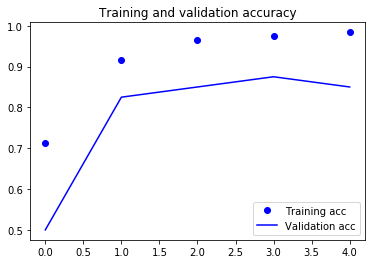

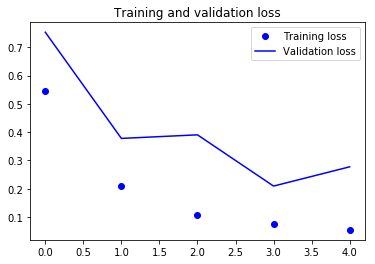

In [30]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

epoch sayısını arttırma


In [31]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [32]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [33]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
50/50 [==============================] - 435s 9s/step - loss: 0.5725 - acc: 0.6840 - val_loss: 0.5564 - val_acc: 0.6750
Epoch 2/10
50/50 [==============================] - 426s 9s/step - loss: 0.2473 - acc: 0.9060 - val_loss: 0.3353 - val_acc: 0.9000
Epoch 3/10
50/50 [==============================] - 433s 9s/step - loss: 0.1273 - acc: 0.9640 - val_loss: 0.2612 - val_acc: 0.8500
Epoch 4/10
50/50 [==============================] - 454s 9s/step - loss: 0.0884 - acc: 0.9820 - val_loss: 0.2569 - val_acc: 0.8500
Epoch 5/10
50/50 [==============================] - 443s 9s/step - loss: 0.0500 - acc: 0.9880 - val_loss: 0.1584 - val_acc: 0.9750
Epoch 6/10
50/50 [==============================] - 451s 9s/step - loss: 0.0525 - acc: 0.9900 - val_loss: 0.1858 - val_acc: 0.9250
Epoch 7/10
50/50 [==============================] - 450s 9s/step - loss: 0.0151 - acc: 0.9980 - val_loss: 0.1278 - val_acc: 0.9500
Epoch 8/10
50/50 [==============================] - 439s 9s/step - loss: 0.0110 - a

In [34]:
model.save('kaplumbaga_arac_small_4.h5')

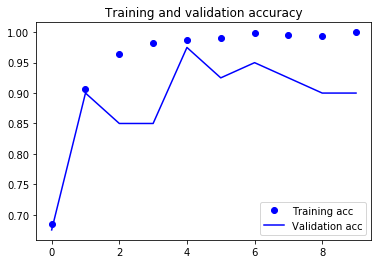

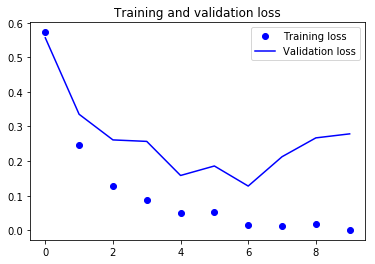

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Weigth Regularization

In [41]:
from keras import regularizers
model = models.Sequential()

#conv2d olduğundan regularizers.l2 olarak tanımlanır.
#0.01 artarsa los artıyor (DENENDİ) ör loss=21.5456,deger azalırsa loss düşüyor.
model.add(layers.Conv2D(32, (3, 3),kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [42]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    
        train_dir,
    
        target_size=(150, 150),
        batch_size=10,
    
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [43]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/5
50/50 [==============================] - 436s 9s/step - loss: 10.0060 - acc: 0.6880 - val_loss: 8.2534 - val_acc: 0.5000
Epoch 2/5
50/50 [==============================] - 431s 9s/step - loss: 6.5713 - acc: 0.8620 - val_loss: 5.7401 - val_acc: 0.5250
Epoch 3/5
50/50 [==============================] - 394s 8s/step - loss: 4.3676 - acc: 0.9240 - val_loss: 4.0273 - val_acc: 0.5750
Epoch 4/5
50/50 [==============================] - 440s 9s/step - loss: 2.9400 - acc: 0.9700 - val_loss: 2.6073 - val_acc: 0.9750
Epoch 5/5
50/50 [==============================] - 408s 8s/step - loss: 2.0846 - acc: 0.9760 - val_loss: 1.9527 - val_acc: 0.9750


In [44]:
model.save('kaplumbaga_arac_small_5.h5')

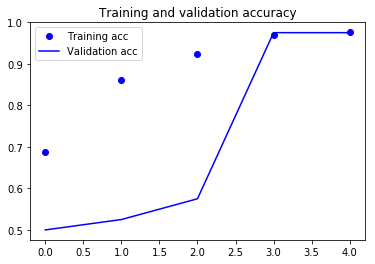

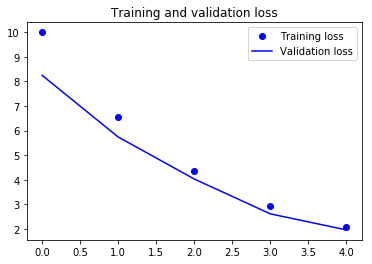

In [45]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()